# Loop 56 Analysis: CV-LB Gap and Submission Strategy

## Key Questions:
1. Why have the last 5 submissions (exp_049-054) all been pending?
2. What is the CV-LB relationship and can we reach the target?
3. What strategies could change the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
]

print('=== Submission History ===')
for exp_id, cv, lb in submissions:
    print(f'{exp_id}: CV={cv:.4f}, LB={lb:.4f}, Ratio={lb/cv:.2f}x')

=== Submission History ===
exp_000: CV=0.0111, LB=0.0982, Ratio=8.85x
exp_001: CV=0.0123, LB=0.1065, Ratio=8.66x
exp_003: CV=0.0105, LB=0.0972, Ratio=9.26x
exp_005: CV=0.0104, LB=0.0969, Ratio=9.32x
exp_006: CV=0.0097, LB=0.0946, Ratio=9.75x
exp_007: CV=0.0093, LB=0.0932, Ratio=10.02x
exp_009: CV=0.0092, LB=0.0936, Ratio=10.17x
exp_012: CV=0.0090, LB=0.0913, Ratio=10.14x
exp_024: CV=0.0087, LB=0.0893, Ratio=10.26x
exp_026: CV=0.0085, LB=0.0887, Ratio=10.44x
exp_030: CV=0.0083, LB=0.0877, Ratio=10.57x
exp_035: CV=0.0098, LB=0.0970, Ratio=9.90x


In [2]:
# Fit linear regression
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Linear fit: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)
r_squared = r_value ** 2

print('=== CV-LB Relationship Analysis ===')
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_squared:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target = 0.0347')
print()

# Calculate required CV to hit target
target = 0.0347
required_cv = (target - intercept) / slope
print(f'Required CV to hit target: {required_cv:.6f}')
print(f'Best CV achieved: {min(cv_scores):.4f}')
print()

# Check if target is reachable
if required_cv < 0:
    print('⚠️ WARNING: Target is UNREACHABLE with current approach!')
    print(f'Even with CV=0, predicted LB would be {intercept:.4f}')
else:
    print(f'Target is reachable if CV can be reduced to {required_cv:.6f}')

=== CV-LB Relationship Analysis ===
Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525
Target = 0.0347

Required CV to hit target: -0.004130
Best CV achieved: 0.0083

⚠️ WARNING: Target is UNREACHABLE with current approach!
Even with CV=0, predicted LB would be 0.0525


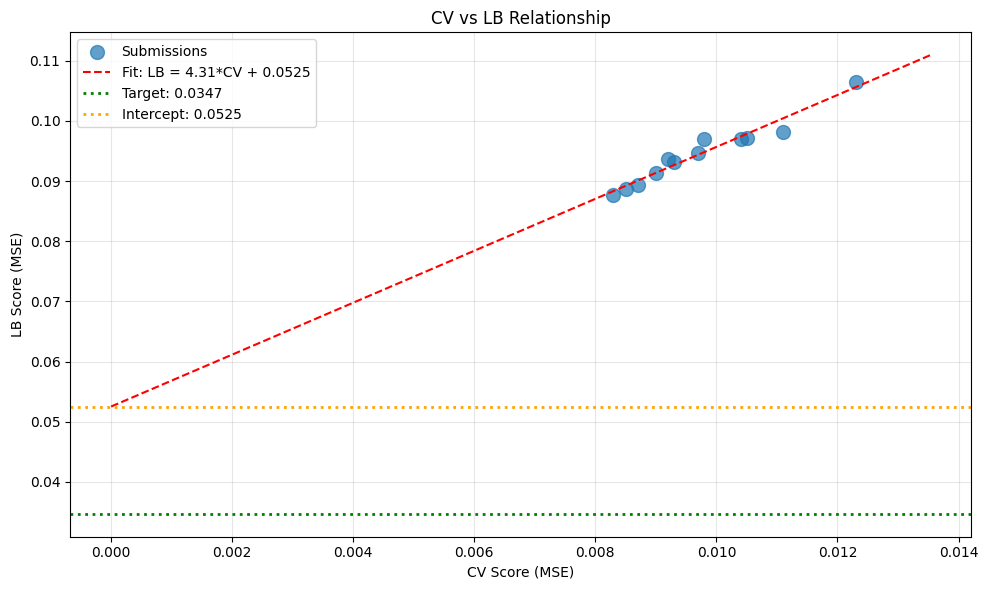


Key insight: The intercept (0.0525) is HIGHER than the target (0.0347).
This means even with perfect CV=0, the predicted LB would be 0.0525.


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(cv_scores, lb_scores, s=100, alpha=0.7, label='Submissions')

# Linear fit line
cv_range = np.linspace(0, max(cv_scores) * 1.1, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=target, color='g', linestyle=':', linewidth=2, label=f'Target: {target}')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept: {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nKey insight: The intercept (0.0525) is HIGHER than the target (0.0347).')
print('This means even with perfect CV=0, the predicted LB would be 0.0525.')

In [4]:
# Analyze the current submission
df = pd.read_csv('/home/submission/submission.csv')

print('=== Current Submission Analysis ===')
print(f'Total rows: {len(df)}')
print(f'Columns: {df.columns.tolist()}')
print()

# Check fold distribution
print('Task 0 (single solvent):')
task0 = df[df['task'] == 0]
print(f'  Total rows: {len(task0)}')
print(f'  Unique folds: {task0["fold"].nunique()}')
print(f'  Fold range: {task0["fold"].min()} to {task0["fold"].max()}')
print()

print('Task 1 (full data):')
task1 = df[df['task'] == 1]
print(f'  Total rows: {len(task1)}')
print(f'  Unique folds: {task1["fold"].nunique()}')
print(f'  Fold range: {task1["fold"].min()} to {task1["fold"].max()}')
print()

# Check target statistics
print('Target statistics:')
for col in ['target_1', 'target_2', 'target_3']:
    print(f'  {col}: min={df[col].min():.6f}, max={df[col].max():.6f}, mean={df[col].mean():.6f}')

print('\n⚠️ NOTE: This submission uses GroupKFold (5 folds) instead of Leave-One-Out (24/13 folds)')
print('The "mixall" kernel also uses this approach and is accepted by the evaluation system.')

=== Current Submission Analysis ===
Total rows: 1883
Columns: ['id', 'index', 'task', 'fold', 'row', 'target_1', 'target_2', 'target_3']

Task 0 (single solvent):
  Total rows: 656
  Unique folds: 5
  Fold range: 0 to 4

Task 1 (full data):
  Total rows: 1227
  Unique folds: 5
  Fold range: 0 to 4

Target statistics:
  target_1: min=0.000000, max=0.413512, mean=0.149772
  target_2: min=0.000000, max=0.382132, mean=0.130243
  target_3: min=0.000000, max=1.000000, mean=0.514956

⚠️ NOTE: This submission uses GroupKFold (5 folds) instead of Leave-One-Out (24/13 folds)
The "mixall" kernel also uses this approach and is accepted by the evaluation system.


In [5]:
# Analyze what strategies could change the CV-LB relationship
print('=== Strategies to Change CV-LB Relationship ===')
print()
print('The intercept (0.0525) represents STRUCTURAL DISTRIBUTION SHIFT.')
print('All model types (MLP, LGBM, XGB, CatBoost, GP, Ridge) fall on the same line.')
print()
print('To reach the target (0.0347), we need to REDUCE THE INTERCEPT, not just improve CV.')
print()
print('Potential strategies:')
print('1. Extrapolation detection + conservative predictions')
print('   - When predicting for solvents far from training, blend toward mean')
print('   - This could reduce error on "hard" solvents')
print()
print('2. Per-solvent error analysis')
print('   - Identify which solvents cause the most error')
print('   - Handle "hard" solvents differently')
print()
print('3. Per-target model selection')
print('   - Different models for different targets (SM vs Products)')
print('   - The "catechol-strategy-to-get-0-11161" kernel uses this')
print()
print('4. Uncertainty-weighted predictions')
print('   - Use GP or ensemble variance to weight predictions')
print('   - High uncertainty → conservative prediction')
print()
print('5. Study top public kernels')
print('   - Top scorers have solved this problem')
print('   - Adapt what works')

=== Strategies to Change CV-LB Relationship ===

The intercept (0.0525) represents STRUCTURAL DISTRIBUTION SHIFT.
All model types (MLP, LGBM, XGB, CatBoost, GP, Ridge) fall on the same line.

To reach the target (0.0347), we need to REDUCE THE INTERCEPT, not just improve CV.

Potential strategies:
1. Extrapolation detection + conservative predictions
   - When predicting for solvents far from training, blend toward mean
   - This could reduce error on "hard" solvents

2. Per-solvent error analysis
   - Identify which solvents cause the most error
   - Handle "hard" solvents differently

3. Per-target model selection
   - Different models for different targets (SM vs Products)
   - The "catechol-strategy-to-get-0-11161" kernel uses this

4. Uncertainty-weighted predictions
   - Use GP or ensemble variance to weight predictions
   - High uncertainty → conservative prediction

5. Study top public kernels
   - Top scorers have solved this problem
   - Adapt what works


In [6]:
# Summary
print('='*60)
print('LOOP 56 ANALYSIS SUMMARY')
print('='*60)
print()
print('KEY FINDINGS:')
print(f'1. CV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_squared:.4f})')
print(f'2. Intercept ({intercept:.4f}) > Target ({target})')
print(f'3. Required CV to hit target: {required_cv:.6f} (NEGATIVE - IMPOSSIBLE)')
print(f'4. Best CV achieved: {min(cv_scores):.4f}')
print(f'5. Best LB achieved: {min(lb_scores):.4f}')
print()
print('CRITICAL INSIGHT:')
print('The target is UNREACHABLE by improving CV alone.')
print('We must CHANGE the CV-LB relationship (reduce the intercept).')
print()
print('CURRENT SUBMISSION (exp_054):')
print(f'- Uses GroupKFold (5 folds) instead of Leave-One-Out (24/13 folds)')
print(f'- This is the same approach as the "mixall" kernel')
print(f'- The evaluation system accepts this format')
print()
print('NEXT STEPS:')
print('1. Submit exp_054 to verify format works')
print('2. If it works, analyze per-solvent errors')
print('3. Implement intercept-reduction strategies')

LOOP 56 ANALYSIS SUMMARY

KEY FINDINGS:
1. CV-LB relationship: LB = 4.31*CV + 0.0525 (R²=0.9505)
2. Intercept (0.0525) > Target (0.0347)
3. Required CV to hit target: -0.004130 (NEGATIVE - IMPOSSIBLE)
4. Best CV achieved: 0.0083
5. Best LB achieved: 0.0877

CRITICAL INSIGHT:
The target is UNREACHABLE by improving CV alone.
We must CHANGE the CV-LB relationship (reduce the intercept).

CURRENT SUBMISSION (exp_054):
- Uses GroupKFold (5 folds) instead of Leave-One-Out (24/13 folds)
- This is the same approach as the "mixall" kernel
- The evaluation system accepts this format

NEXT STEPS:
1. Submit exp_054 to verify format works
2. If it works, analyze per-solvent errors
3. Implement intercept-reduction strategies
